In [ ]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [ ]:
# Cargar (importar) un dataset - Mercado Inmobiliario en California
california = fetch_california_housing(download_if_missing=True)

df = pd.DataFrame(california.data, columns=california.feature_names)
df['Price'] = california.target

# Agregamos el tipo EsDeLujo: Una nueva variable clasificadora que me indique si la casa es de lujo o no (0 - No, 1 - Si)
precio_medio = np.median(df['Price'])
df['EsDeLujo'] = (df['Price'] > precio_medio).astype(int)

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
 9   EsDeLujo    20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB
None


In [ ]:
# Definir las caracteristicas (X) y la prediccion (y)
X = df[['MedInc', 'HouseAge', 'AveRooms', 'Population', 'AveOccup']]
y = df['EsDeLujo']

In [ ]:
print(X.head())
print(y.head())

   MedInc  HouseAge  AveRooms  Population  AveOccup
0  8.3252      41.0  6.984127       322.0  2.555556
1  8.3014      21.0  6.238137      2401.0  2.109842
2  7.2574      52.0  8.288136       496.0  2.802260
3  5.6431      52.0  5.817352       558.0  2.547945
4  3.8462      52.0  6.281853       565.0  2.181467
0    1
1    1
2    1
3    1
4    1
Name: EsDeLujo, dtype: int64


In [ ]:
# Preparar el entrenamiento de los datos (particionarlos) en datos de entrenamiento y datos de prueba
tam_datos_prueba = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=tam_datos_prueba, random_state=42)

In [ ]:
# Criterios: GINI y Entropia, el mas comun es gini
criterio_calidad="gini"

# Creacion de nuestro arbol de decision, el arbol tiene 4 niveles de ramificaciones (max_depth)
model = DecisionTreeClassifier(max_depth=4, random_state=42, criterion=criterio_calidad)

In [ ]:
# Entrenamiento del modelo con los datos de entrenamiento: X_train, y_train
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [ ]:
# Realizar predicciones con los datos de test (X_test)
y_predicciones = model.predict(X_test)
print(y_predicciones)

y_probabilidades = model.predict_proba(X_test)
print(y_probabilidades)

[0 0 1 ... 1 0 0]
[[0.8803132  0.1196868 ]
 [0.9295302  0.0704698 ]
 [0.19613527 0.80386473]
 ...
 [0.02247706 0.97752294]
 [0.9295302  0.0704698 ]
 [0.57511312 0.42488688]]


In [ ]:
# Hallar la precision (accuracy), matriz de confusion
precision = accuracy_score(y_test, y_predicciones)
print(f"La precisión es: {precision:.4f}")

La precisión es: 0.7752


In [ ]:
print("Matriz de confusion")
matrix = confusion_matrix(y_test, y_predicciones)
print(matrix)

Matriz de confusion
[[1842  235]
 [ 693 1358]]


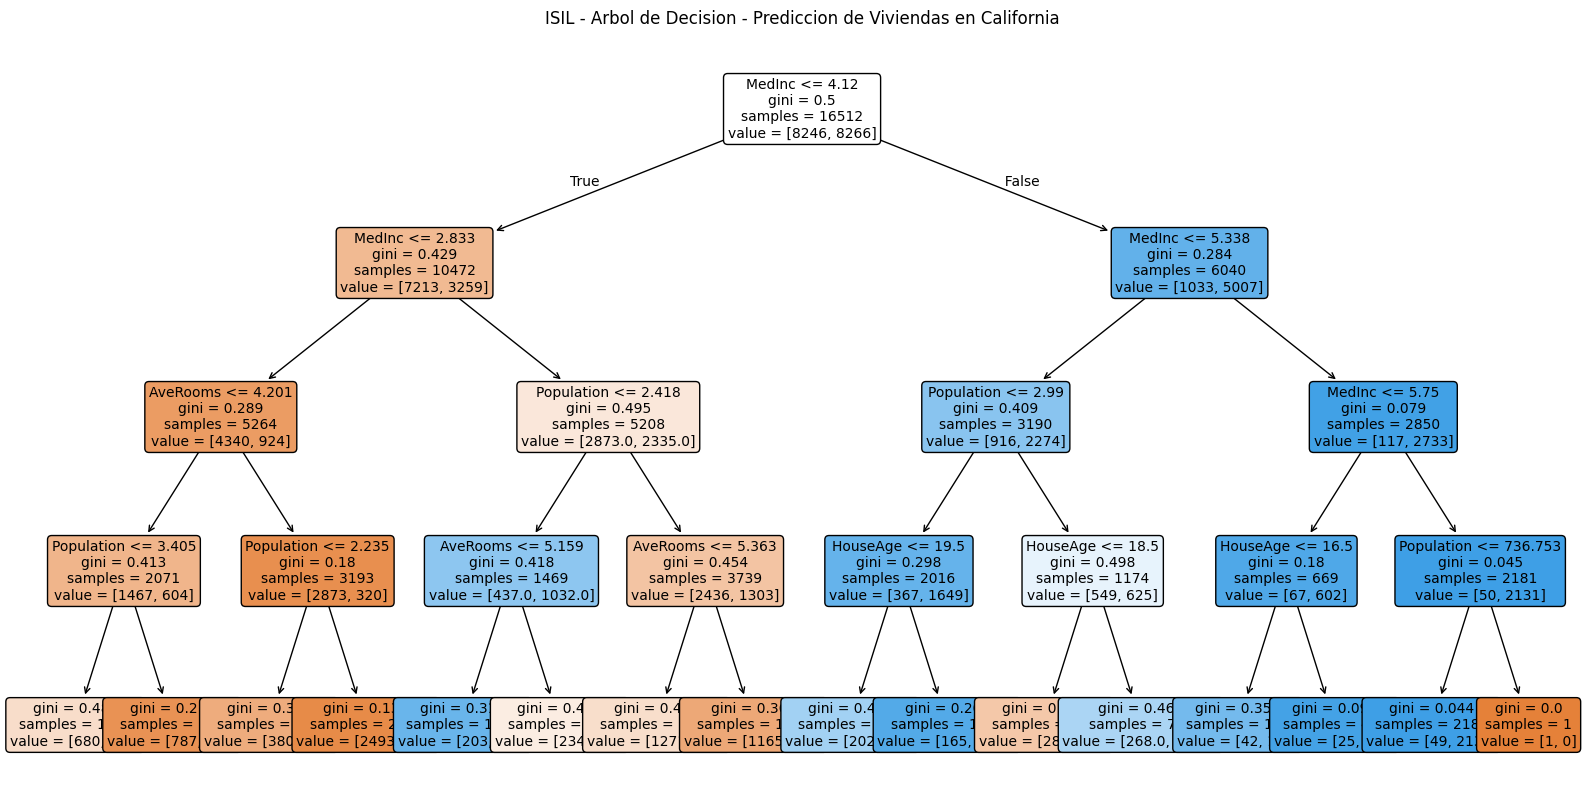

In [ ]:
# Pintar el arbol
plt.figure(figsize=(20,10))
plot_tree(model, feature_names=california.feature_names, filled=True, rounded=True, fontsize=10)
plt.title("ISIL - Arbol de Decision - Prediccion de Viviendas en California")
plt.show()